In [3]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
import time

data_path = os.path.join('.','tests','test_output')

In [4]:
y_true = []

knn_y = []
svm_y = []
dt_y = []

for i in range(8):
    pca = PCA(n_components = 100)
    X = np.load(os.path.join(data_path,'x_split8_{}.npy'.format(i)),mmap_mode='r')
    Y = np.load(os.path.join(data_path,'y_split8_{}.npy'.format(i)),mmap_mode='r')
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify = Y)
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    svm = SVC(C=1000,kernel = 'linear')
    dt = tree.DecisionTreeClassifier()
    
    knn.fit(X_train,y_train)
    svm.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    y_true.append(y_test)
    start_time = time.time()
    knn_y.append(knn.predict(X_test))
    print(time.time()-start_time)
    svm_y.append(svm.predict(X_test))
    print(time.time()-start_time)
    dt_y.append(dt.predict(X_test))
    print(time.time()-start_time)
    

0.2339017391204834
0.37285709381103516
0.3738830089569092
0.22790241241455078
0.3808622360229492
0.3818495273590088
0.22290921211242676
0.3708617687225342
0.3718743324279785
0.22493410110473633
0.3888835906982422
0.38987231254577637
0.22292876243591309
0.3738837242126465
0.37488365173339844
0.21593022346496582
0.3798801898956299
0.38187718391418457
0.20593762397766113
0.35788965225219727
0.35889148712158203
0.2079334259033203
0.3568863868713379
0.35788559913635254


In [11]:
from mlxtend.evaluate import cochrans_q
import numpy as np
import itertools

y_all = np.ravel(y_true)
knn_all = np.ravel(knn_y)
dt_all = np.ravel(dt_y)
svm_all = np.ravel(svm_y)

q, p_value = cochrans_q(y_all, 
                    knn_all, 
                    svm_all, 
                    dt_all)
print("q:{},p:{}".format(q, p_value))

q:276.5125142207053,p:9.03796069649009e-61


In [6]:
for i in range(8):
    knn_sc = np.mean(y_true[i]==knn_y[i])
    print("knn score:{}".format(knn_sc))
    
    svm_sc = np.mean(y_true[i]==svm_y[i])
    print("svm score:{}".format(svm_sc))
    
    dt_sc = np.mean(y_true[i]==dt_y[i])
    print("dt score:{}".format(dt_sc))


knn score:0.5878787878787879
svm score:0.6888888888888889
dt score:0.5545454545454546
knn score:0.5888888888888889
svm score:0.6262626262626263
dt score:0.5232323232323233
knn score:0.6121212121212121
svm score:0.6363636363636364
dt score:0.5414141414141415
knn score:0.5474747474747474
svm score:0.5747474747474748
dt score:0.46060606060606063
knn score:0.5525252525252525
svm score:0.5909090909090909
dt score:0.49797979797979797
knn score:0.5272727272727272
svm score:0.5737373737373738
dt score:0.5050505050505051
knn score:0.6202020202020202
svm score:0.6424242424242425
dt score:0.5363636363636364
knn score:0.603030303030303
svm score:0.6090909090909091
dt score:0.5181818181818182


In [13]:
print(np.mean(y_all==knn_all))
print(np.mean(y_all==svm_all))
print(np.mean(y_all==dt_all))

0.5799242424242425
0.6178030303030303
0.5171717171717172


In [14]:
import numpy as np
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar


print("compare knn svm\n")
knn_svm_tb = mcnemar_table(y_target=y_all, 
               y_model1=knn_all, 
               y_model2=svm_all)
print(knn_svm_tb)

chi2, p = mcnemar(ary=knn_svm_tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

print("compare knn dt\n")
knn_dt_tb = mcnemar_table(y_target=y_all, 
           y_model1=knn_all, 
           y_model2=dt_all)

print(knn_dt_tb)

chi2, p = mcnemar(ary=knn_dt_tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

print("compare svm dt\n")
svm_dt_tb = mcnemar_table(y_target=y_all, 
       y_model1=svm_all, 
       y_model2=dt_all)

print(svm_dt_tb)

chi2, p = mcnemar(ary=svm_dt_tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
    
    

compare knn svm

[[3655 1238]
 [ 938 2089]]
chi-squared: 41.08501838235294
p-value: 1.4574925449339975e-10
compare knn dt

[[3175  921]
 [1418 2406]]
chi-squared: 105.17999144933732
p-value: 1.1153041474242718e-24
compare svm dt

[[3236  860]
 [1657 2167]]
chi-squared: 251.73460468812078
p-value: 1.0871396620633743e-56


In [15]:
number_sample = len(y_all)
knn_true = np.zeros(24)
knn_false = np.zeros(24)

svm_true = np.zeros(24)
svm_false = np.zeros(24)

dt_true = np.zeros(24)
dt_false = np.zeros(24)

for i in range(number_sample):
    if(y_all[i] == knn_all[i]):
        knn_true[knn_all[i]] += 1
    else:
        knn_false[knn_all[i]] += 1
    
    if(y_all[i] == svm_all[i]):
        svm_true[svm_all[i]] += 1
    else:
        svm_false[svm_all[i]] += 1
        
    if(y_all[i] == dt_all[i]):
        dt_true[dt_all[i]] += 1
    else:
        dt_false[dt_all[i]] += 1

[ 78. 134. 109. 159.  87.  59.  51. 117. 116. 122.  31. 339. 105.  18.
 179. 345. 426.  97.  46. 128. 216.  49.  86. 230.]
[169. 260. 261.  75. 101.  68.  77.  64.  85.  68.  41. 282. 124.   6.
 206. 249. 213.  94. 136.  94. 132.  45.  93.  84.]
[157. 195. 174. 112. 116. 157. 116. 128. 124. 105.  74. 328. 159.  33.
 249. 259. 303. 116. 175. 149. 198.  75. 151. 171.]


In [23]:
knn_percentage_false = knn_false/(knn_true + knn_false)*100
svm_percentage_false = svm_false/(svm_true + svm_false)*100
dt_percentage_false = dt_false/(dt_true+dt_false)*100

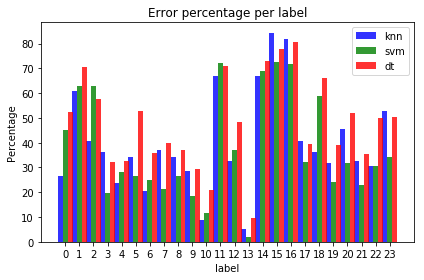

In [25]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 24
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, knn_percentage_false, bar_width,
alpha=opacity,
color='b',
label='knn')
 
rects2 = plt.bar(index + bar_width, svm_percentage_false, bar_width,
alpha=opacity,
color='g',
label='svm')

rects2 = plt.bar(index + 2*bar_width, dt_percentage_false, bar_width,
alpha=opacity,
color='r',
label='dt')
 
plt.xlabel('label')
plt.ylabel('Percentage')
plt.title('Error percentage per label')
plt.xticks(index + bar_width, range(24))
plt.legend()
 
plt.tight_layout()
plt.show()